In [1]:
from datetime import datetime, timezone, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_excel('btc_future_brr.xlsx')
data = pd.read_csv('btc_future_brr.csv')
data.dropna(axis=0, inplace=True)

In [2]:
data

,Unnamed: 0,Unnamed: 1,btc future last px,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,brr last px
1,Th,05/20/2021,40320.0,55539.0,48678.0,31481.0,6364.0,5731.0,41861.09
2,We,05/19/2021,39340.0,55891.0,48546.0,31338.0,6340.0,5378.0,35734.10
3,Tu,05/18/2021,43150.0,56237.0,48385.0,31198.0,6443.0,5058.0,43118.61
4,Mo,05/17/2021,44060.0,56468.0,48188.0,31041.0,6080.0,4802.0,44384.66
8,Fr,05/14/2021,50190.0,56630.0,47982.0,30877.0,6021.0,4636.0,50769.13
...,...,...,...,...,...,...,...,...,...
1076,Mo,10/8/2018,6630.0,6651.0,6867.0,8414.0,2438.0,1731.0,6612.76
1080,Fr,10/5/2018,6530.0,6675.0,6883.0,8466.0,2221.0,1720.0,6541.74
1081,Th,10/4/2018,6555.0,6710.0,6903.0,8524.0,2172.0,1729.0,6541.51
1082,We,10/3/2018,6425.0,6742.0,6925.0,8587.0,2090.0,1745.0,6465.84


In [3]:
data.loc[:,'Date'] = pd.to_datetime(data.iloc[:,1])
data.loc[:,'btc future last px'] = data.loc[:,'btc future last px'].astype(float)
data.loc[:,'brr last px'] = data.loc[:,'brr last px'].astype(float)

In [4]:
data = data.loc[:,['Date', 'btc future last px', 'brr last px']]

In [5]:
btc_price = data.loc[:,'btc future last px']
brr_price = data.loc[:,'brr last px']

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


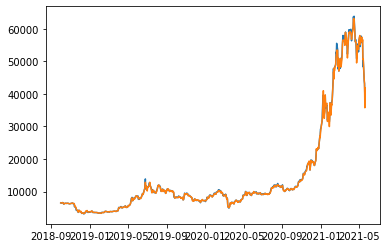

In [6]:
plt.plot(data.Date, btc_price)
plt.plot(data.Date, brr_price)

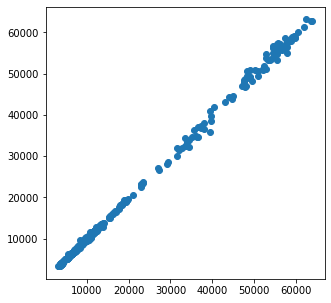

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(btc_price, brr_price)

In [8]:
data.loc[:,'log return future'] = np.log(btc_price/btc_price.shift(-1))
data.loc[:,'log return btc'] = np.log(brr_price/brr_price.shift(-1))

In [9]:
btc = data.loc[:,'log return future'] 
brr = data.loc[:,'log return btc'] 

In [10]:
data

,Date,btc future last px,brr last px,log return future,log return btc
1,2021-05-20,40320.0,41861.09,0.024606,0.158251
2,2021-05-19,39340.0,35734.10,-0.092441,-0.187849
3,2021-05-18,43150.0,43118.61,-0.020870,-0.028939
4,2021-05-17,44060.0,44384.66,-0.130263,-0.134395
8,2021-05-14,50190.0,50769.13,0.037039,0.003599
...,...,...,...,...,...
1076,2018-10-08,6630.0,6612.76,0.015198,0.010798
1080,2018-10-05,6530.0,6541.74,-0.003821,0.000035
1081,2018-10-04,6555.0,6541.51,0.020031,0.011635
1082,2018-10-03,6425.0,6465.84,-0.013143,-0.010170


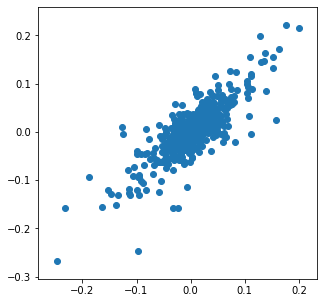

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(brr, btc)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

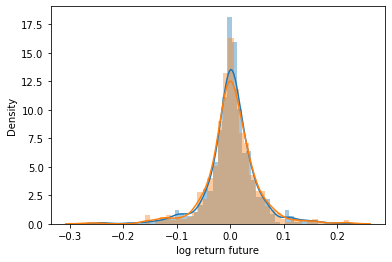

In [12]:
import seaborn as sns

sns.distplot(brr)
sns.distplot(btc)

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0, 1)

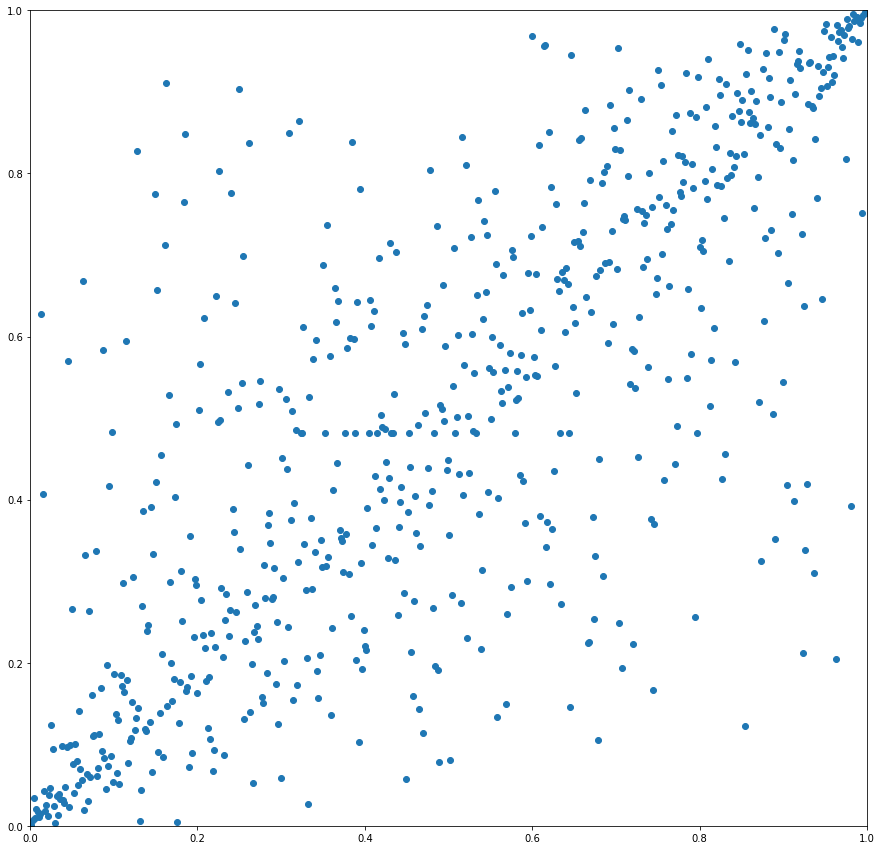

In [14]:
ecdf1 = ECDF(brr)
ecdf2 = ECDF(btc)

plt.figure(figsize=(15,15))
plt.scatter(ecdf1(brr), ecdf2(btc))
plt.xlim((0,1))
plt.ylim((0,1))

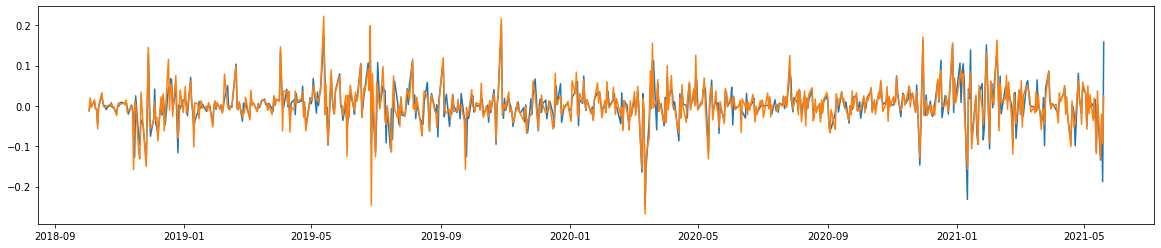

In [15]:
plt.figure(figsize=(20,4))
plt.plot(data.Date, brr)
plt.plot(data.Date, btc)

In [17]:
data.to_csv('../cleaned_data/btc_future_brr_new.csv')